In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load featured dataset
df = pd.read_csv("../data/processed/pollutants_with_features.csv")
df_sample = df.sample(frac=0.1, random_state=42)

In [2]:
df_sample.info()
df_sample.describe()
df_sample.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 174666 entries, 673708 to 1726223
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         174666 non-null  int64  
 1   State Code         174666 non-null  int64  
 2   County Code        174666 non-null  int64  
 3   Site Num           174666 non-null  int64  
 4   Address            174666 non-null  object 
 5   State              174666 non-null  object 
 6   County             174666 non-null  object 
 7   City               174666 non-null  object 
 8   Date Local         174666 non-null  object 
 9   NO2 Units          174666 non-null  object 
 10  NO2 Mean           174666 non-null  float64
 11  NO2 1st Max Value  174666 non-null  float64
 12  NO2 1st Max Hour   174666 non-null  int64  
 13  NO2 AQI            174666 non-null  int64  
 14  O3 Units           174666 non-null  object 
 15  O3 Mean            174666 non-null  float64
 16  O

Unnamed: 0              0
State Code              0
County Code             0
Site Num                0
Address                 0
State                   0
County                  0
City                    0
Date Local              0
NO2 Units               0
NO2 Mean                0
NO2 1st Max Value       0
NO2 1st Max Hour        0
NO2 AQI                 0
O3 Units                0
O3 Mean                 0
O3 1st Max Value        0
O3 1st Max Hour         0
O3 AQI                  0
SO2 Units               0
SO2 Mean             2318
SO2 1st Max Value       0
SO2 1st Max Hour        0
SO2 AQI                 0
CO Units                0
CO Mean               121
CO 1st Max Value        0
CO 1st Max Hour         0
CO AQI                  0
SO2_AQI_missing         0
CO_AQI_missing          0
year                    0
month                   0
day                     0
weekday                 0
is_weekend              0
NO2_to_SO2           2318
CO_to_SO2            2436
O3_to_CO    

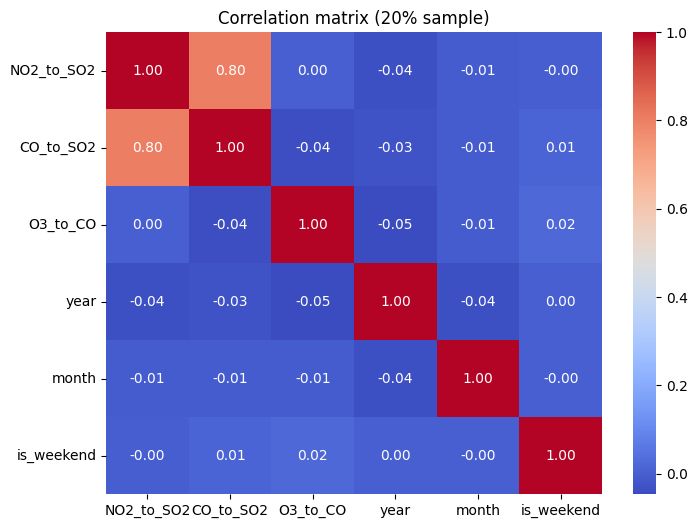

In [4]:
feature_cols = ["NO2_to_SO2", "CO_to_SO2", "O3_to_CO", "year", "month", "is_weekend"]

corr = df_sample[feature_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix (20% sample)")
plt.show()

/tmp/ipykernel_18124/2546369936.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_sample.set_index("Date Local").resample("M")[["NO2_to_SO2", "CO_to_SO2", "O3_to_CO"]].mean()


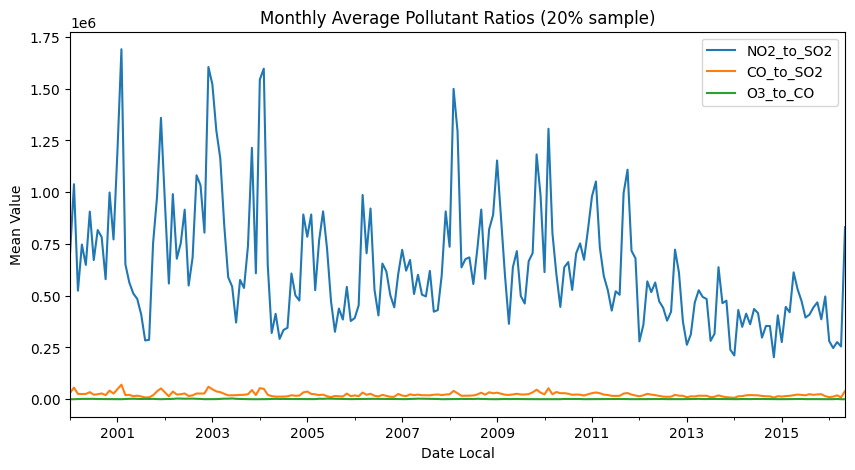

In [5]:
# Resample by month, mean of pollutant interaction features
df_sample["Date Local"] = pd.to_datetime(df_sample["Date Local"])

monthly_avg = df_sample.set_index("Date Local").resample("M")[["NO2_to_SO2", "CO_to_SO2", "O3_to_CO"]].mean()

monthly_avg.plot(figsize=(10, 5))
plt.title("Monthly Average Pollutant Ratios (20% sample)")
plt.ylabel("Mean Value")
plt.show()

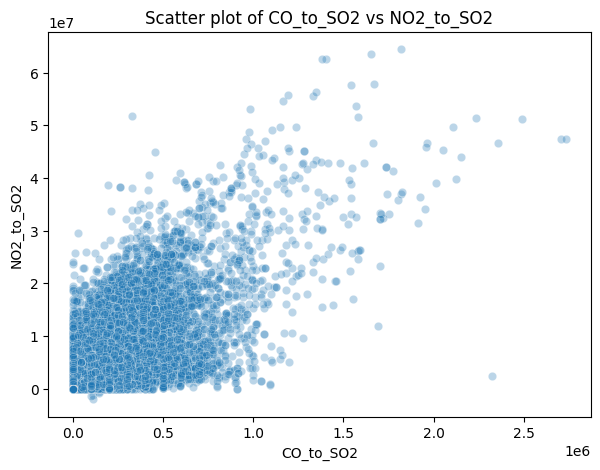

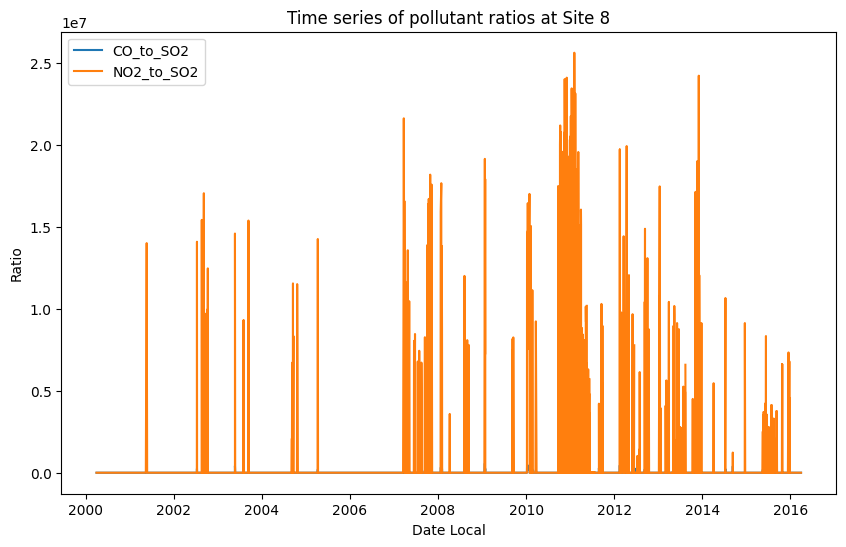

Correlation between CO_to_SO2 and NO2_to_SO2 by State:
State
Alabama                 0.961925
Alaska                  0.624283
Arizona                 0.924265
Arkansas                0.910500
California              0.839333
Colorado                0.837372
Connecticut             0.774919
Country Of Mexico       0.970647
Delaware                0.851277
District Of Columbia    0.979205
Florida                 0.749365
Georgia                 0.770917
Hawaii                  0.635267
Idaho                   0.988323
Illinois                0.902040
Indiana                 0.870869
Iowa                    0.959046
Kansas                  0.735099
Kentucky                0.389120
Louisiana               0.832873
Maine                   0.812885
Maryland                0.917767
Massachusetts           0.781941
Michigan                0.936428
Minnesota               0.926193
Missouri                0.765390
Nevada                  0.539547
New Hampshire           0.825280
New Jersey     

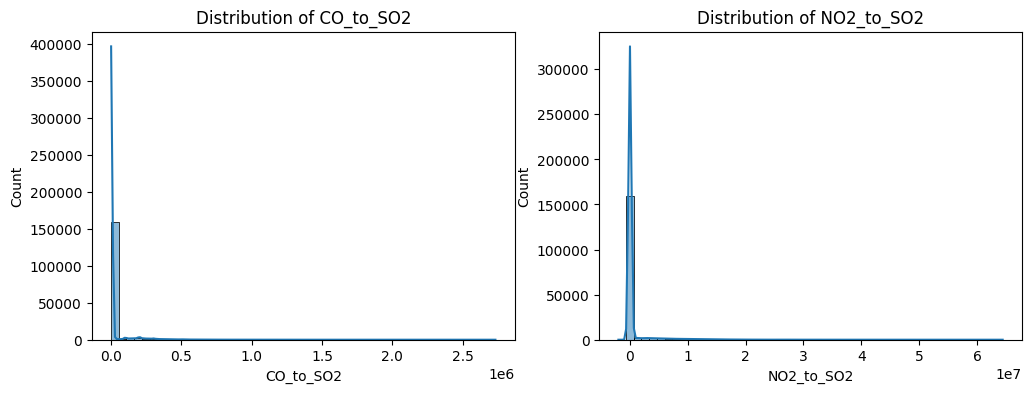

In [6]:
# Scatter plot of CO_to_SO2 vs NO2_to_SO2
plt.figure(figsize=(7, 5))
sns.scatterplot(x="CO_to_SO2", y="NO2_to_SO2", data=df_sample, alpha=0.3)
plt.title("Scatter plot of CO_to_SO2 vs NO2_to_SO2")
plt.xlabel("CO_to_SO2")
plt.ylabel("NO2_to_SO2")
plt.show()

# Time series plot for a single site to check trends
site_id = df_sample["Site Num"].iloc[0]
df_site = df_sample[df_sample["Site Num"] == site_id].sort_values("Date Local")

plt.figure(figsize=(10, 6))
plt.plot(df_site["Date Local"], df_site["CO_to_SO2"], label="CO_to_SO2")
plt.plot(df_site["Date Local"], df_site["NO2_to_SO2"], label="NO2_to_SO2")
plt.title(f"Time series of pollutant ratios at Site {site_id}")
plt.xlabel("Date Local")
plt.ylabel("Ratio")
plt.legend()
plt.show()

# Correlation by State
corr_by_state = df_sample.groupby("State")[["CO_to_SO2", "NO2_to_SO2"]].corr().unstack().iloc[:, 1]
print("Correlation between CO_to_SO2 and NO2_to_SO2 by State:")
print(corr_by_state)

# Distribution check for potential outliers/skew
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_sample["CO_to_SO2"], bins=50, kde=True)
plt.title("Distribution of CO_to_SO2")
plt.subplot(1, 2, 2)
sns.histplot(df_sample["NO2_to_SO2"], bins=50, kde=True)
plt.title("Distribution of NO2_to_SO2")
plt.show()